<a href="https://colab.research.google.com/github/gundall98/AI-X-Machine-Learning/blob/master/AI%2BX_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_3%EB%B2%88_%EA%B3%BC%EC%A0%9C_PCA_%EB%AA%A8%EB%8D%B8%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%A0_%EC%88%98_%EC%9E%88%EB%8A%94_%EC%98%88%EC%8B%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Codes  Returns  KODEX's Returns at same time  S&P's Return
0          0     0.02                          0.02          0.43
1          0     0.21                          0.21          0.06
2          0    -0.70                         -0.70         -0.11
3          0     0.43                          0.43         -0.21
4          0     0.92                          0.92          0.17
...      ...      ...                           ...           ...
15490     14     0.02                         -1.06         -2.18
15491     14     0.00                          0.24          1.70
15492     14     0.01                          0.65          1.28
15493     14     0.01                          2.58          2.43
15494     14     0.00                          0.23         -0.87

[15495 rows x 4 columns]


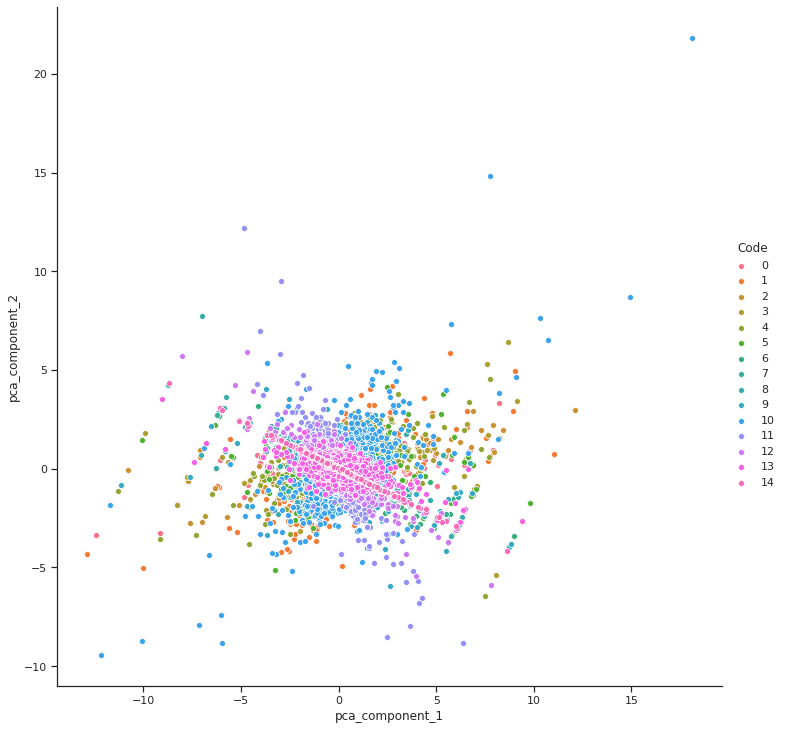

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from matplotlib.dates import MonthLocator, DateFormatter
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style = 'ticks')

df = pd.read_csv("NADropedReturns(Eng).csv",encoding="utf-8")
print(df)
Codes = df["Codes"].values
df = df.drop(['Codes'],1)


df = StandardScaler().fit_transform(df)

def get_pca_data(ss_data,n_components=2):
  pca = PCA(n_components = n_components)
  pca.fit(ss_data)

  return pca.transform(ss_data),pca

stock_pca, pca = get_pca_data(df,n_components =2)
stock_pca
def get_pd_from_pca(pca_data,cols = ["pca_component_1","pca_component_2"]):
  return pd.DataFrame(pca_data,columns=cols)

stock_pd_pca = get_pd_from_pca(stock_pca)
stock_pd_pca["Code"] = Codes
sns.pairplot(stock_pd_pca,height = 10,hue = "Code", palette = "husl",x_vars=["pca_component_1"],y_vars=["pca_component_2"])
plt.show()


In [0]:
def print_variance_ratio(pca):
  print("variance_ratio: ",pca.explained_variance_ratio_)
  print("sum of variance_ratio",np.sum(pca.explained_variance_ratio_))
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
def rf_scores(X,y,cv=5):
  rf = RandomForestClassifier(random_state=13,n_estimators=100)
  scores_rf = cross_val_score(rf,X,y,scoring="accuracy")

NameError: ignored